In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

In [3]:
df = pd.read_csv('../data/csv/sampled_wells_cleaned.csv', converters={'id': lambda x: str(x.strip()),
                                                                'zip': lambda x: str(x.strip()),
                                                                'city': lambda x: str(x.strip()),
                                                                'add': lambda x: str(x.strip())})

In [4]:
df.head()

,add,city,state,zip,id,date,ar,ph,sample_id,date_tested,year_tested,group,group_five,group_mcl
0,644 DALLAS SPENCER MTN RD,DALLAS,NC,28034,11531,2011-01-03,0.0,6.4,0,2011-01-03,2011,0,0,0
1,5110 WEAVER GLENN PL,BESSEMER CITY,NC,28016,10769,2011-01-04,0.0,6.7,1,2011-01-04,2011,0,0,0
2,5116 WEAVER GLENN PL,BESSEMER CITY,NC,28016,10564,2011-01-04,0.0,6.4,3,2011-01-04,2011,0,0,0
3,731 COVENTRY CT,BELMONT,NC,28012,,2011-01-24,0.0,6.5,5,2011-01-24,2011,0,0,0
4,134 HUFFSTETLER LAKE RD,DALLAS,NC,28034,,2011-01-26,0.0,5.1,6,2011-01-26,2011,0,0,0


In [14]:
df['date_tested'] = pd.to_datetime(df['date_tested'], format='%Y-%m-%d')

# creates 2 new dataframes, one to check the number of elevated arsenic samples 2011-2017 
# and the other to check the number of elevated arsenic samples 2018-2022

new = df[df['year_tested'] > 2017]
og = df[df['year_tested'] < 2018]



In [15]:
print(f''' With a threshold of 0.001 mg/L, there are:

number of elevated arsenic samples 2011-2017')

{len(og[og['group'] == 1])}

/ {len(og)}

number of elevated arsenic samples 2018-2022

{len(new[new['group'] == 1])}

/ {len(new)}
''')

 With a threshold of 0.001 mg/L, there are:

number of elevated arsenic samples 2011-2017')

40

/ 1025

number of elevated arsenic samples 2018-2022

78

/ 662



In [16]:
print(f''' With a threshold of 0.005 mg/L, there are:

number of elevated arsenic samples 2011-2017

{len(og[og['group_five'] == 1])}

/ {len(og)}

number of elevated arsenic samples 2018-2022

{len(new[new['group_five'] == 1])}

/ {len(new)}
''')

 With a threshold of 0.005 mg/L, there are:

number of elevated arsenic samples 2011-2017

40

/ 1025

number of elevated arsenic samples 2018-2022

18

/ 662



In [17]:
# Check again for missingness

df[(df['year_tested'] < 2018)].isnull().sum()

add            0
city           0
state          0
zip            0
id             0
date           0
ar             0
ph             0
sample_id      0
date_tested    0
year_tested    0
group          0
group_five     0
group_mcl      0
dtype: int64

Since testing instruments couldn't detect below 0.005 prior to 2018, there are many samples between 0.001 and 0.005 for 2018-2022 thus making it look like the number of elevated detects has increased. 0.001 was chosen as the cutoff still for modeling purposes since it's the 0.001-0.005 is still of concern to health. If the cutoff was 0.005, the bar chart would show 41 elevated samples 2011-2017 and 19 for 2018-2022 instead

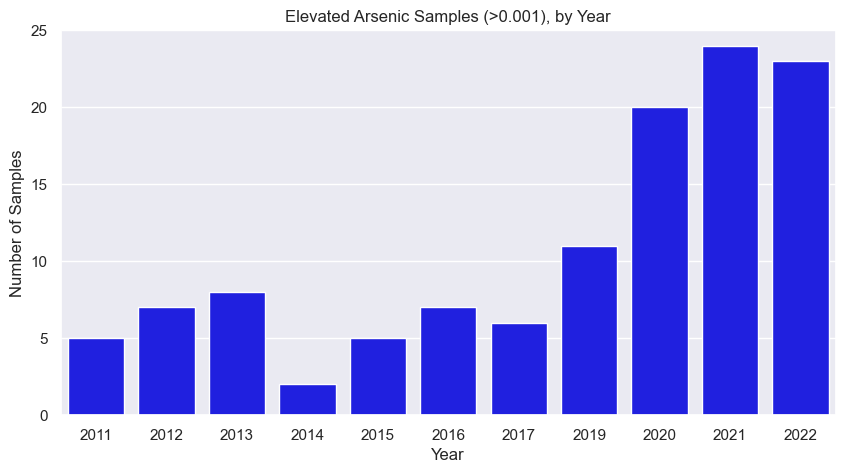

In [28]:
# bar chart of elevated arsenic samples (>0.001) 2011-2022

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
sns.countplot(x='year_tested', data=df[df['group'] == 1], color='blue')
plt.title('Elevated Arsenic Samples (>0.001), by Year')
plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.ylim(0, 25);


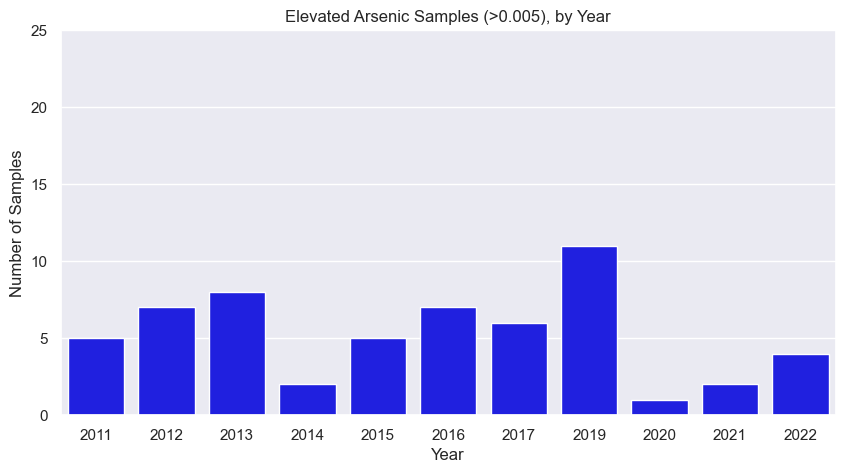

In [27]:
# bar chart of elevated arsenic samples (>0.005) 2011-2022

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
sns.countplot(x='year_tested', data=df[df['group_five'] == 1], color='blue')
plt.title('Elevated Arsenic Samples (>0.005), by Year')
plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.ylim(0, 25);


---

The problem with looking at average test results per year

In [20]:
df= df.sort_values(by=['date_tested'])
viz = df.set_index('date_tested')
avg_yearly = viz['ar'].resample('Y').mean()

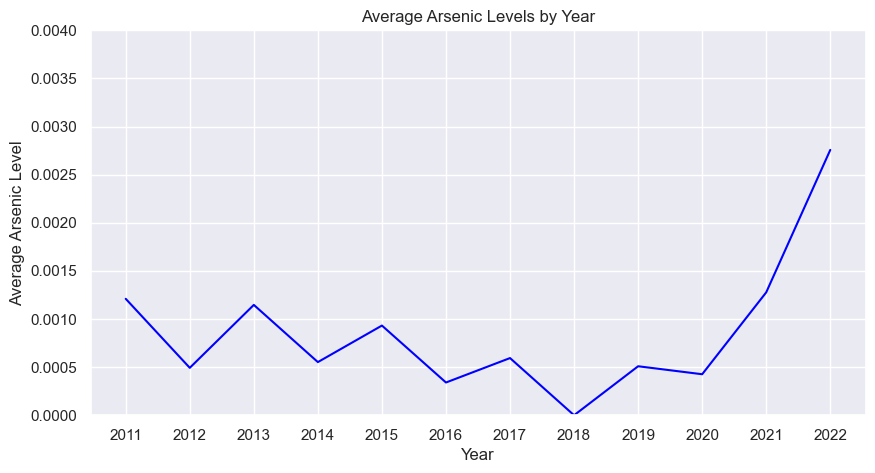

In [21]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_yearly.index.year, y=avg_yearly.values, color='blue')
plt.title('Average Arsenic Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Arsenic Level')
plt.ylim(0, 0.004)
plt.xticks(np.arange(2011, 2023, 1));

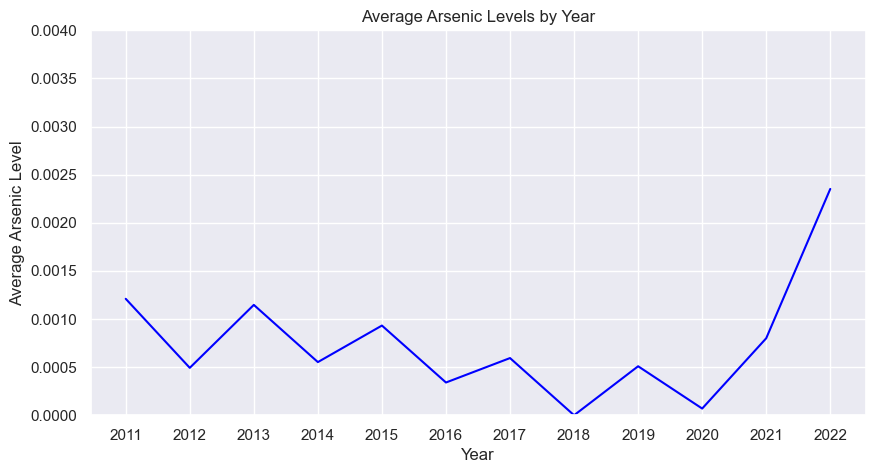

In [23]:
# same as above but with elevated arsenic samples defined as >= 0.005

df= df.sort_values(by=['date_tested'])
viz = df.set_index('date_tested')

li = []

for each in viz['ar']:
    if each < 0.005:
        li.append(float(0))
    else: li.append(each)

viz['ar'] = li


avg_yearly = viz['ar'].resample('Y').mean()

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_yearly.index.year, y=avg_yearly.values, color='blue')
plt.title('Average Arsenic Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Arsenic Level')
plt.ylim(0, 0.004)
plt.xticks(np.arange(2011, 2023, 1));


As you can tell from the chart above and below, there is one sample in 2022 that is heavily skewing the data

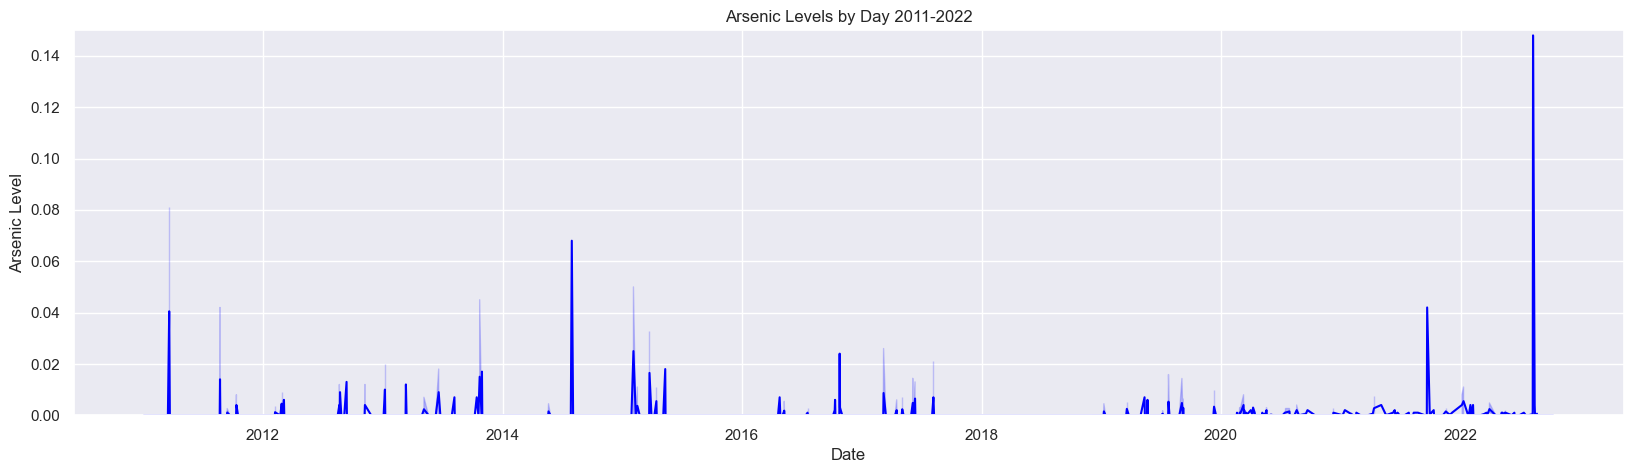

In [24]:
# line plot of arsenic samples 

sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('Set2')

plt.figure(figsize=(20, 5))
sns.lineplot(x=df['date_tested'], y=df['ar'], color='blue')
plt.title('Arsenic Levels by Day 2011-2022')
plt.xlabel('Date')
plt.ylabel('Arsenic Level')
plt.ylim(0, 0.15);



In [ ]:
# Number of total

df['group'].value_counts()

0    1581
1     133
Name: group, dtype: int64

Check the percentage of elevated samples by year

In [25]:
viz = df[['year_tested','group_five']]

viz = pd.get_dummies(viz, columns=['group_five'])

viz = viz.groupby(['year_tested']).sum()

viz = pd.DataFrame(viz.reset_index())

viz['total'] = (viz['group_five_0'] + viz['group_five_1'])

viz['group_five_0_pct'] = round(((viz['group_five_0'] / viz['total']) * 100), 2)

viz['group_five_1_pct'] = round(((viz['group_five_1'] / viz['total']) * 100), 2)

viz.set_index('year_tested', inplace=True)

viz = viz[['group_five_1', 'group_five_1_pct', 'total']]
viz.columns = ['> 0.005', '% > 0.005', 'Total']
viz

,> 0.005,% > 0.005,Total
year_tested,,,
2011,5,3.50,143
2012,7,5.15,136
2013,8,6.90,116
2014,2,1.49,134
2015,5,3.79,132
2016,7,3.61,194
2017,6,3.53,170
2018,0,0.00,76
2019,11,3.31,332


Lists all values for arsenis concentration in the dataset

In [26]:
df['ar'].value_counts()

ar
0.000    1569
0.001      38
0.002       9
0.006       9
0.004       7
0.007       7
0.003       6
0.008       5
0.009       5
0.010       3
0.011       3
0.012       3
0.018       3
0.013       2
0.024       2
0.045       1
0.037       1
0.042       1
0.070       1
0.020       1
0.019       1
0.043       1
0.005       1
0.017       1
0.021       1
0.026       1
0.033       1
0.081       1
0.050       1
0.068       1
0.148       1
Name: count, dtype: int64

**The value for 0.148 is far above any other result, and may be an error**